In [1]:
%matplotlib inline
#  disable transparency for gif making
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import os
from glob import glob

import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator

import geopandas as gpd

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

import contextily as cx

from shapely.geometry import Point, Polygon

In [2]:
data_dir = '/cluster/tufts/hugheslab/datasets/NSF_OD/'
svi_dir = os.path.join(data_dir,'SocialVulnerabilityIndex')
result_dir = os.path.join(data_dir, 'results_20220606_update')


mass_shapefile = os.path.join(data_dir,'shapefiles','MA_2021')
town_shapefile = os.path.join(data_dir,'shapefiles','MA_2020_Towns',
                              'CENSUS2020TOWNS_POLY.shp')

In [3]:
svi_file = os.path.join(result_dir,'svi_month')
svi_gdf = gpd.read_file(svi_file)

In [4]:
tract_gdf = gpd.read_file(mass_shapefile)
tract_gdf.loc[:,'TRACTCE'] = tract_gdf['TRACTCE'].astype(int)

In [5]:
town_shapes = gpd.read_file(town_shapefile)
towns_lat_lon = town_shapes.to_crs({'init': 'epsg:4269'}) 

/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/modern_zigp/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
matched_df = pd.read_csv(os.path.join(result_dir,'geocoded_deaths_2000_2020.csv')) 
matched_df['dod_dt'] = pd.to_datetime(matched_df['dod_dt'])
matched_df['month'] = matched_df['dod_dt'].dt.month
matched_df.loc[:,'tract'] = matched_df['tract'].astype(int)

In [7]:
matched_df['points'] = matched_df.apply(lambda x: Point(x['lon'], x['lat']), axis=1)

/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/modern_zigp/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [8]:
matched_df['town'] = ''
for i, row in matched_df.iterrows():
    towns_contains = towns_lat_lon['geometry'].contains(row['points'])
    assert(towns_contains.sum()==1)
    matched_df.loc[i,'town'] = towns_lat_lon[towns_contains]['NAMELSAD20'].values[0]

In [9]:
deaths_per_town_df = matched_df.groupby(['year','month','town']).size().reset_index(name='deaths')

In [10]:
deaths_gdf = gpd.GeoDataFrame()
for year in deaths_per_town_df.year.unique():
    for month in deaths_per_town_df.month.unique():
        these_deaths = deaths_per_town_df[(deaths_per_town_df['year']==year) & (deaths_per_town_df['month']==month)]
        years_merged_deaths = towns_lat_lon.merge(these_deaths,
                                             left_on='NAMELSAD20',
                                             right_on='town',
                                             how='left')
        # fill NAs
        years_merged_deaths.loc[:,'year']=year
        years_merged_deaths.loc[:,'month']=month
        years_merged_deaths.loc[:,'deaths'] = years_merged_deaths.loc[:,'deaths'].fillna(0)
        deaths_gdf = deaths_gdf.append(years_merged_deaths)

deaths_gdf= deaths_gdf.reset_index(drop=True)

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deaths_gdf = deaths_gdf.append(years_merged_deaths)
/tmp/ipykernel_87914/3887659514.py:13: FutureWarning: The frame.append method is deprecated and 

In [11]:
just_tracts = svi_gdf.loc[(svi_gdf['year']==2000)&(svi_gdf['month']==1),['GEOID','geometry', 'INTPTLAT', 'INTPTLON']]
just_tracts['points'] = just_tracts.apply(lambda x: Point(np.float(x['INTPTLON']), np.float(x['INTPTLAT'])), axis=1)
just_towns = deaths_gdf.loc[(deaths_gdf['year']==2000)&(deaths_gdf['month']==1)]

/tmp/ipykernel_87914/3168380086.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  just_tracts['points'] = just_tracts.apply(lambda x: Point(np.float(x['INTPTLON']), np.float(x['INTPTLAT'])), axis=1)
/cluster/tufts/hugheslab/kheuto01/miniconda3/envs/modern_zigp/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [15]:
%%capture
svi_cols = ['theme_1_pc','theme_2_pc','theme_3_pc','theme_4_pc','svi_pctile']

town_svi_gdf = gpd.GeoDataFrame()
tracts_used = set()

for town in just_towns.NAMELSAD20.unique():
    this_town = just_towns[(just_towns['NAMELSAD20']==town)]
    town_geo =this_town['geometry']

    tracts_containing_town = just_tracts[just_tracts.geometry.intersects(town_geo.centroid.values[0])]
    tracts_in_town = just_tracts[just_tracts.geometry.centroid.intersects(town_geo.values[0])]

    child_tracts = set(np.append(tracts_containing_town.GEOID.values,tracts_in_town.GEOID.values))
    tracts_used.update(child_tracts)

    avg_svi = svi_gdf[svi_gdf.GEOID.isin(child_tracts)].groupby(['year','month']).mean()[svi_cols].reset_index()

    this_towns_svi = deaths_gdf.loc[deaths_gdf['NAMELSAD20']==town].merge(avg_svi, on=['year','month',])
    
    town_svi_gdf = town_svi_gdf.append(this_towns_svi)
    
    

In [249]:
svi_file = os.path.join(result_dir,'svi_month_town')
gpd.GeoDataFrame(town_svi_gdf).to_file(svi_file)

In [250]:
result_dir

'/cluster/tufts/hugheslab/datasets/NSF_OD/results_20220606_update'

In [239]:
svi_cols = ['theme_1_pc','theme_2_pc','theme_3_pc','theme_4_pc','svi_pctile']
svi_gdf[svi_gdf.GEOID.isin(child_tracts)].groupby(['year','month']).mean()[svi_cols].reset_index()


,year,month,theme_1_pc,theme_2_pc,theme_3_pc,theme_4_pc,svi_pctile
0,2000,1,0.7540,0.5614,0.1162,0.9396,0.6660
1,2000,2,0.7540,0.5614,0.1162,0.9396,0.6660
2,2000,3,0.7540,0.5614,0.1162,0.9396,0.6660
3,2000,4,0.7540,0.5614,0.1162,0.9396,0.6660
4,2000,5,0.7540,0.5614,0.1162,0.9396,0.6660
...,...,...,...,...,...,...,...
259,2021,8,0.3043,0.6354,0.2365,0.9005,0.5745
260,2021,9,0.3043,0.6354,0.2365,0.9005,0.5745
261,2021,10,0.3043,0.6354,0.2365,0.9005,0.5745
262,2021,11,0.3043,0.6354,0.2365,0.9005,0.5745


In [240]:
tracts_in_town

,GEOID,geometry,INTPTLAT,INTPTLON,points
586,25003913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369...",+42.3678582,-073.2697633,POINT (-73.26976 42.36786)


In [241]:
just_tracts.geometry.centroid

/tmp/ipykernel_104717/1958641731.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  just_tracts.geometry.centroid


0       POINT (-71.15065 42.47105)
1       POINT (-71.12732 42.48147)
2       POINT (-71.14612 42.48504)
3       POINT (-71.12504 42.38474)
4       POINT (-71.12263 42.38958)
                   ...            
1615    POINT (-71.00423 42.48067)
1616    POINT (-71.00987 42.61320)
1617    POINT (-71.03029 42.48874)
1618    POINT (-71.03840 42.46813)
1619    POINT (-71.02494 42.59286)
Length: 1620, dtype: geometry

In [242]:
svi_gdf.groupby(['GEOID','year','month']).count()['geometry'][svi_gdf.groupby(['GEOID','year','month']).count()['geometry']>1].reset_index().year.unique()

array([], dtype=int64)

In [61]:
matched_df.dod_dt.max()

Timestamp('2021-12-31 00:00:00')

In [145]:
town_geo.centroid

/tmp/ipykernel_104717/2182439293.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  town_geo.centroid


0    POINT (-73.27599 42.37164)
dtype: geometry

/tmp/ipykernel_104717/2868361769.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  town_geo.centroid.values[0]


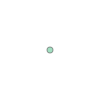

In [148]:
town_geo.centroid.values[0]

/tmp/ipykernel_104717/2868361769.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  town_geo.centroid.values[0]


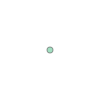

In [153]:
town_geo.centroid.values[0]

In [164]:
just_towns

,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,POP2020,POPCH10_20,HOUSING20,SHAPE_AREA,SHAPE_LEN,geometry,year,month,town,deaths
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,5.611554e+07,37500.214450,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,1,NaN,0.0
1,25,003,44385,00598751,2500344385,New Ashford town,43,T1,G4040,770,...,250,22,126,3.489808e+07,27059.943786,"POLYGON ((-73.17154 42.62871, -73.17177 42.626...",2000,1,NaN,0.0
2,25,003,51580,00619422,2500351580,Otis town,43,T1,G4040,None,...,1634,22,1609,9.855865e+07,50393.890580,"POLYGON ((-73.00787 42.23841, -73.00826 42.237...",2000,1,NaN,0.0
3,25,015,29265,00618202,2501529265,Hatfield town,43,T1,G4040,790,...,3352,73,1634,4.357039e+07,30189.515722,"POLYGON ((-72.58114 42.42258, -72.58111 42.422...",2000,1,NaN,0.0
4,25,027,12715,00618359,2502712715,Charlton town,43,T1,G4040,715,...,13315,334,5239,1.134152e+08,47896.581632,"POLYGON ((-71.90923 42.09126, -71.90969 42.091...",2000,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,25,011,51265,00618173,2501151265,Orange town,43,T1,G4040,715,...,7569,-270,3544,9.327522e+07,53903.648819,"POLYGON ((-72.22493 42.63894, -72.22690 42.638...",2000,1,NaN,0.0
347,25,013,36300,00618186,2501336300,Longmeadow town,43,T1,G4040,790,...,15853,69,5967,2.485064e+07,19840.310565,"POLYGON ((-72.53664 42.06374, -72.53661 42.063...",2000,1,NaN,0.0
348,25,007,26325,00618290,2500726325,Gosnold town,43,T1,G4040,None,...,70,-5,218,3.465402e+07,103404.977956,"MULTIPOLYGON (((-70.71331 41.51504, -70.71300 ...",2000,1,NaN,0.0
349,25,007,69940,00619443,2500769940,Tisbury town,43,T1,G4040,None,...,4815,866,3226,1.698851e+07,40254.546868,"MULTIPOLYGON (((-70.60260 41.48243, -70.60230 ...",2000,1,NaN,0.0


In [186]:
svi_gdf.shape

(427680, 26)

In [187]:
427680/22

19440.0

In [188]:
deaths_per_town_df.shape

(13117, 4)

In [192]:
13117/351

37.370370370370374

In [193]:
deaths_gdf.shape

(92664, 41)

In [196]:
92664/351/22

12.0

In [231]:
deaths_gdf[deaths_gdf['NAMELSAD20']==town]

,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,geometry,year,month,town,deaths,theme_1_pc,theme_2_pc,theme_3_pc,theme_4_pc,svi_pctile
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,1,NaN,0.0,0.754,0.5614,0.1162,0.9396,0.666
351,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
702,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1053,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,4,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1404,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,5,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90909,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,8,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91260,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,9,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91611,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,10,NaN,0.0,NaN,NaN,NaN,NaN,NaN
91962,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,11,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [208]:
svi_gdf[svi_gdf['GEOID'].isin(child_tracts) &(svi_gdf['year']==2021)]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,theme_1_pc,theme_2_pc,theme_3_pc,theme_4_pc,svi_pctile,FIPS,ROUNDED_TR,ROUNDED__1,TRACTCE_y,geometry
408900,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
410520,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
412140,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
413760,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
415380,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
417000,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
418620,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
420240,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
421860,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."
423480,25,003,913100,25003913100,9131,Census Tract 9131,G5020,S,54951001,1168561,...,0.3043,0.6354,0.2365,0.9005,0.5745,25003913100,None,None,913100,"POLYGON ((-73.33362 42.36890, -73.33078 42.369..."


In [213]:
deaths_gdf.loc[deaths_gdf['NAMELSAD20']==town].merge(avg_svi, on=['year','month',])

,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,theme_1_pc_x,theme_2_pc_x,theme_3_pc_x,theme_4_pc_x,svi_pctile_x,theme_1_pc_y,theme_2_pc_y,theme_3_pc_y,theme_4_pc_y,svi_pctile_y
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.7540,0.5614,0.1162,0.9396,0.6660
1,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.7540,0.5614,0.1162,0.9396,0.6660
2,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.7540,0.5614,0.1162,0.9396,0.6660
3,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.7540,0.5614,0.1162,0.9396,0.6660
4,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.7540,0.5614,0.1162,0.9396,0.6660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.3043,0.6354,0.2365,0.9005,0.5745
260,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.3043,0.6354,0.2365,0.9005,0.5745
261,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.3043,0.6354,0.2365,0.9005,0.5745
262,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,0.754,0.5614,0.1162,0.9396,0.666,0.3043,0.6354,0.2365,0.9005,0.5745


In [217]:
deaths_gdf.loc[deaths_gdf['NAMELSAD20']==town].svi_pctile.unique()

array([0.666])

In [218]:
avg_svi

,year,month,theme_1_pc,theme_2_pc,theme_3_pc,theme_4_pc,svi_pctile
0,2000,1,0.7540,0.5614,0.1162,0.9396,0.6660
1,2000,2,0.7540,0.5614,0.1162,0.9396,0.6660
2,2000,3,0.7540,0.5614,0.1162,0.9396,0.6660
3,2000,4,0.7540,0.5614,0.1162,0.9396,0.6660
4,2000,5,0.7540,0.5614,0.1162,0.9396,0.6660
...,...,...,...,...,...,...,...
259,2021,8,0.3043,0.6354,0.2365,0.9005,0.5745
260,2021,9,0.3043,0.6354,0.2365,0.9005,0.5745
261,2021,10,0.3043,0.6354,0.2365,0.9005,0.5745
262,2021,11,0.3043,0.6354,0.2365,0.9005,0.5745


In [224]:
deaths_gdf.loc[deaths_gdf['NAMELSAD20']==town].merge(avg_svi, on=['year','month',])[svi_cols]

,theme_1_pc,theme_2_pc,theme_3_pc,theme_4_pc,svi_pctile
0,0.7540,0.5614,0.1162,0.9396,0.6660
1,0.7540,0.5614,0.1162,0.9396,0.6660
2,0.7540,0.5614,0.1162,0.9396,0.6660
3,0.7540,0.5614,0.1162,0.9396,0.6660
4,0.7540,0.5614,0.1162,0.9396,0.6660
...,...,...,...,...,...
259,0.3043,0.6354,0.2365,0.9005,0.5745
260,0.3043,0.6354,0.2365,0.9005,0.5745
261,0.3043,0.6354,0.2365,0.9005,0.5745
262,0.3043,0.6354,0.2365,0.9005,0.5745


In [225]:
deaths_gdf.loc[deaths_gdf['NAMELSAD20']==town]

,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,POP2020,POPCH10_20,HOUSING20,SHAPE_AREA,SHAPE_LEN,geometry,year,month,town,deaths
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,1,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,2,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,3,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,4,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,5,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,8,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,9,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,10,NaN,0.0
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,56115544.39,37500.21445,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2021,11,NaN,0.0


,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,POP2020,POPCH10_20,HOUSING20,SHAPE_AREA,SHAPE_LEN,geometry,year,month,town,deaths
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,5.611554e+07,37500.214450,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,1,NaN,0.0
1,25,003,44385,00598751,2500344385,New Ashford town,43,T1,G4040,770,...,250,22,126,3.489808e+07,27059.943786,"POLYGON ((-73.17154 42.62871, -73.17177 42.626...",2000,1,NaN,0.0
2,25,003,51580,00619422,2500351580,Otis town,43,T1,G4040,None,...,1634,22,1609,9.855865e+07,50393.890580,"POLYGON ((-73.00787 42.23841, -73.00826 42.237...",2000,1,NaN,0.0
3,25,015,29265,00618202,2501529265,Hatfield town,43,T1,G4040,790,...,3352,73,1634,4.357039e+07,30189.515722,"POLYGON ((-72.58114 42.42258, -72.58111 42.422...",2000,1,NaN,0.0
4,25,027,12715,00618359,2502712715,Charlton town,43,T1,G4040,715,...,13315,334,5239,1.134152e+08,47896.581632,"POLYGON ((-71.90923 42.09126, -71.90969 42.091...",2000,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92659,25,011,51265,00618173,2501151265,Orange town,43,T1,G4040,715,...,7569,-270,3544,9.327522e+07,53903.648819,"POLYGON ((-72.22493 42.63894, -72.22690 42.638...",2021,12,Orange town,3.0
92660,25,013,36300,00618186,2501336300,Longmeadow town,43,T1,G4040,790,...,15853,69,5967,2.485064e+07,19840.310565,"POLYGON ((-72.53664 42.06374, -72.53661 42.063...",2021,12,NaN,0.0
92661,25,007,26325,00618290,2500726325,Gosnold town,43,T1,G4040,None,...,70,-5,218,3.465402e+07,103404.977956,"MULTIPOLYGON (((-70.71331 41.51504, -70.71300 ...",2021,12,NaN,0.0
92662,25,007,69940,00619443,2500769940,Tisbury town,43,T1,G4040,None,...,4815,866,3226,1.698851e+07,40254.546868,"MULTIPOLYGON (((-70.60260 41.48243, -70.60230 ...",2021,12,NaN,0.0


In [18]:
just_tracts

,GEOID,geometry,INTPTLAT,INTPTLON,points
0,25017333300,"POLYGON ((-71.16139 42.47071, -71.16136 42.471...",+42.4707641,-071.1520550,POINT (-71.15206 42.47076)
1,25017333400,"POLYGON ((-71.14690 42.48077, -71.14673 42.480...",+42.4845479,-071.1320320,POINT (-71.13203 42.48455)
2,25017333502,"POLYGON ((-71.15960 42.48482, -71.15954 42.484...",+42.4850405,-071.1461193,POINT (-71.14612 42.48504)
3,25017354500,"POLYGON ((-71.13077 42.38261, -71.13070 42.382...",+42.3847449,-071.1250400,POINT (-71.12504 42.38474)
4,25017354700,"POLYGON ((-71.12901 42.39007, -71.12768 42.389...",+42.3895812,-071.1226285,POINT (-71.12263 42.38958)
...,...,...,...,...,...
1615,25009208302,"POLYGON ((-71.01723 42.48901, -71.01705 42.489...",+42.4850384,-071.0040806,POINT (-71.00408 42.48504)
1616,25009212101,"POLYGON ((-71.05565 42.62288, -71.05509 42.625...",+42.6136944,-071.0052311,POINT (-71.00523 42.61369)
1617,25009208401,"POLYGON ((-71.04695 42.48796, -71.04672 42.488...",+42.4876121,-071.0307634,POINT (-71.03076 42.48761)
1618,25009208402,"POLYGON ((-71.05389 42.47878, -71.05373 42.479...",+42.4662513,-071.0359714,POINT (-71.03597 42.46625)


In [17]:
len(tracts_used)

1586

In [19]:
unused_tracts = [tract for tract in just_tracts.GEOID.unique() if tract not in tracts_used]

<AxesSubplot: >

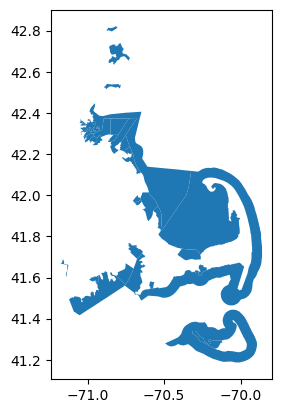

In [22]:
just_tracts[just_tracts['GEOID'].isin(unused_tracts)].plot()

In [23]:
deaths_gdf

,STATEFP20,COUNTYFP20,COUSUBFP20,COUSUBNS20,GEOID20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CNECTAFP20,...,POP2020,POPCH10_20,HOUSING20,SHAPE_AREA,SHAPE_LEN,geometry,year,month,town,deaths
0,25,003,34970,00618269,2500334970,Lenox town,43,T1,G4040,770,...,5095,70,3184,5.611554e+07,37500.214450,"POLYGON ((-73.22195 42.40058, -73.22432 42.392...",2000,1,NaN,0.0
1,25,003,44385,00598751,2500344385,New Ashford town,43,T1,G4040,770,...,250,22,126,3.489808e+07,27059.943786,"POLYGON ((-73.17154 42.62871, -73.17177 42.626...",2000,1,NaN,0.0
2,25,003,51580,00619422,2500351580,Otis town,43,T1,G4040,None,...,1634,22,1609,9.855865e+07,50393.890580,"POLYGON ((-73.00787 42.23841, -73.00826 42.237...",2000,1,NaN,0.0
3,25,015,29265,00618202,2501529265,Hatfield town,43,T1,G4040,790,...,3352,73,1634,4.357039e+07,30189.515722,"POLYGON ((-72.58114 42.42258, -72.58111 42.422...",2000,1,NaN,0.0
4,25,027,12715,00618359,2502712715,Charlton town,43,T1,G4040,715,...,13315,334,5239,1.134152e+08,47896.581632,"POLYGON ((-71.90923 42.09126, -71.90969 42.091...",2000,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92659,25,011,51265,00618173,2501151265,Orange town,43,T1,G4040,715,...,7569,-270,3544,9.327522e+07,53903.648819,"POLYGON ((-72.22493 42.63894, -72.22690 42.638...",2021,12,Orange town,3.0
92660,25,013,36300,00618186,2501336300,Longmeadow town,43,T1,G4040,790,...,15853,69,5967,2.485064e+07,19840.310565,"POLYGON ((-72.53664 42.06374, -72.53661 42.063...",2021,12,NaN,0.0
92661,25,007,26325,00618290,2500726325,Gosnold town,43,T1,G4040,None,...,70,-5,218,3.465402e+07,103404.977956,"MULTIPOLYGON (((-70.71331 41.51504, -70.71300 ...",2021,12,NaN,0.0
92662,25,007,69940,00619443,2500769940,Tisbury town,43,T1,G4040,None,...,4815,866,3226,1.698851e+07,40254.546868,"MULTIPOLYGON (((-70.60260 41.48243, -70.60230 ...",2021,12,NaN,0.0


In [25]:
92664 /22

4212.0

In [26]:
matched_df

,id,address,match,matchtype,parsed,tigerlineid,side,statefp,countyfp,tract,block,lat,lon,SFN_NUM,year,quarter,dod_dt,month,points,town
0,2007_605,"58 MYRTLE ST, NORWOOD, MA, 2062",True,Exact,"58 MYRTLE ST, NORWOOD, MA, 02062",87243536.0,L,25.0,21.0,413202,1012.0,42.201649,-71.202264,2007_605,2007,4,2007-12-15,12,POINT (-71.20226365099995 42.20164852100004),Norwood town
1,2002_349,"646 BIRCH ST, FALL RIVER, MA, 2724",True,Exact,"646 BIRCH ST, FALL RIVER, MA, 02724",46767810.0,L,25.0,5.0,640400,2005.0,41.684234,-71.176381,2002_349,2002,3,2002-07-15,7,POINT (-71.17638094399996 41.68423381400004),Fall River city
2,2007_607,"573 OSBORN ST, FALL RIVER, MA, 2724",True,Exact,"573 OSBORN ST, FALL RIVER, MA, 02724",651813019.0,R,25.0,5.0,640500,1005.0,41.690942,-71.160056,2007_607,2007,4,2007-12-16,12,POINT (-71.16005623599995 41.69094189400005),Fall River city
3,2002_348,"8 MICHIGAN AV, LYNN, MA, 1902",True,Exact,"8 MICHIGAN AVE, LYNN, MA, 01902",86646827.0,L,25.0,9.0,206600,4000.0,42.467733,-70.924900,2002_348,2002,3,2002-07-17,7,POINT (-70.92490047599995 42.46773255600005),Lynn city
4,2007_606,"175 OSBORNE ST, FALL RIVER, MA, 2724",True,Non_Exact,"175 OSBORN ST, FALL RIVER, MA, 02724",46770133.0,R,25.0,5.0,640500,3001.0,41.692127,-71.166843,2007_606,2007,4,2007-11-09,11,POINT (-71.16684342099995 41.69212749500008),Fall River city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22120,2017_1707,"863 WASHINGTON STREET , WHITMAN, MASSACHUSETT...",True,Exact,"863 WASHINGTON ST, WHITMAN, MA, 02382",87445852.0,R,25.0,23.0,521201,2004.0,42.087970,-70.941268,2017_1707,2017,4,2017-12-12,12,POINT (-70.94126804399997 42.08796966300008),Whitman town
22121,2021_1252,"29 KILLDEER ISLAND ROAD , WEBSTER, MASSACHUSE...",True,Exact,"29 KILLDEER ISLAND RD, WEBSTER, MA, 01570",40020553.0,L,25.0,27.0,754100,3000.0,42.054861,-71.843274,2021_1252,2021,3,2021-07-29,7,POINT (-71.84327385599994 42.054861337000034),Webster town
22122,2021_1253,"75 HOPKINS PLACE , LONGMEADOW, MASSACHUSETTS,...",True,Exact,"75 HOPKINS PL, LONGMEADOW, MA, 01106",4038067.0,R,25.0,13.0,813301,1015.0,42.056212,-72.578282,2021_1253,2021,3,2021-07-29,7,POINT (-72.57828240299995 42.05621220100005),Longmeadow town
22123,2021_1254,"86 BELLEVUE STREET , WORCESTER, MASSACHUSETTS...",True,Exact,"86 BELLEVUE ST, WORCESTER, MA, 01610",40009694.0,R,25.0,27.0,731400,4002.0,42.260255,-71.817195,2021_1254,2021,3,2021-07-25,7,POINT (-71.81719454699999 42.26025527200005),Worcester city
